In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.metrics import precision_score,recall_score,f1_score
import tensorflow as tf
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("https://github.com/benvictoria17/MachineLearning/blob/master/dataset/Android%20Malware%20Dataset%20for%20Machine%20Learning/drebin-215-dataset-5560malware-9476-benign.csv?raw=true")
print("Total missing value :", sum(list(data.isna().sum())))
data

Total missing value : 0


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (92) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


In [3]:
classes,count = np.unique(data['class'],return_counts=True)
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
data = data.replace(classes,lbl_enc.fit_transform(classes))

data=data.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(data.isna().sum())))
data.dropna(inplace=True)
for c in data.columns:
    data[c] = pd.to_numeric(data[c])
data

[0 1] ['B' 'S']
Total missing values :  5


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


In [4]:
print("Total Features : ",len(data.columns)-1)

Total Features :  215


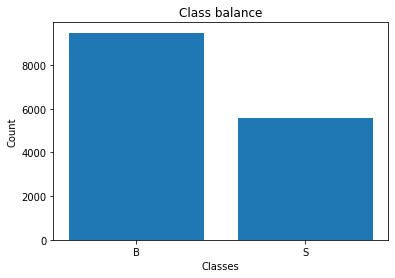

In [5]:
plt.bar(classes,count)
plt.title("Class balance")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [6]:
train_x,test_x,train_y,test_y = train_test_split(data[data.columns[:len(data.columns)-1]].to_numpy(),
                                                 data[data.columns[-1]].to_numpy(),
                                                  test_size = 0.2,
                                                  shuffle=True)
print("Train features size : ",len(train_x))
print("Train labels size : ",len(train_y))
print("Test features size : ",len(test_x))
print("Test features size : ",len(test_y))

Train features size :  12024
Train labels size :  12024
Test features size :  3007
Test features size :  3007


In [7]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (12024, 215)
Train labels :  (12024,)
Test Features :  (3007, 215)
Test labels :  (3007,)


In [8]:
train_y = train_y.reshape((-1,1))
test_y = test_y.reshape((-1,1))
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (12024, 215)
Train labels :  (12024, 1)
Test Features :  (3007, 215)
Test labels :  (3007, 1)


In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(215,activation='relu',input_shape=(None,215)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 215)         46440     
_________________________________________________________________
dense_1 (Dense)              (None, None, 100)         21600     
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           101       
Total params: 68,141
Trainable params: 68,141
Non-trainable params: 0
_________________________________________________________________


2022-03-22 05:52:43.771819: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model.compile(optimizer = keras.optimizers.RMSprop(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
ep=5
history = model.fit(train_x,
                    train_y,
                    validation_data = (test_x,test_y),
                    epochs = ep)

2022-03-22 05:52:44.074606: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
376/376 [==============================] - 2s 4ms/step - loss: 0.1031 - accuracy: 0.9660 - val_loss: 0.0742 - val_accuracy: 0.9744
Epoch 2/5
376/376 [==============================] - 1s 4ms/step - loss: 0.0553 - accuracy: 0.9825 - val_loss: 0.0393 - val_accuracy: 0.9850
Epoch 3/5
376/376 [==============================] - 1s 4ms/step - loss: 0.0461 - accuracy: 0.9878 - val_loss: 0.0485 - val_accuracy: 0.9854
Epoch 4/5
376/376 [==============================] - 1s 4ms/step - loss: 0.0378 - accuracy: 0.9910 - val_loss: 0.0339 - val_accuracy: 0.9884
Epoch 5/5
376/376 [==============================] - 1s 4ms/step - loss: 0.0338 - accuracy: 0.9919 - val_loss: 0.0271 - val_accuracy: 0.9927


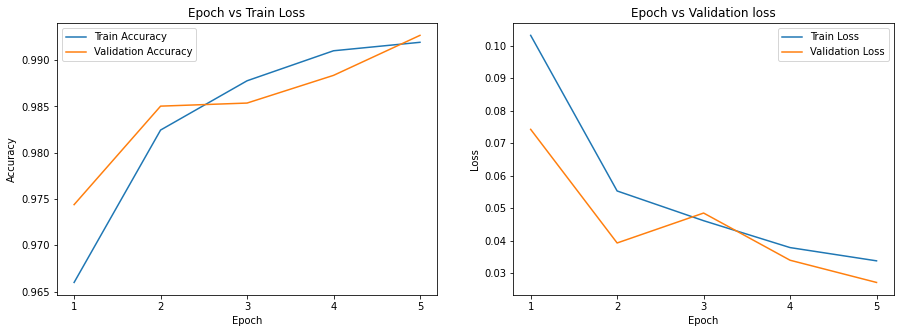

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot([str(i) for i in range(1,ep+1)],history.history['accuracy'],label="Train Accuracy")
plt.plot([str(i) for i in range(1,ep+1)],history.history['val_accuracy'],label="Validation Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch vs Train Loss")

plt.subplot(1,2,2)
plt.plot([str(i) for i in range(1,ep+1)],history.history['loss'],label="Train Loss")
plt.plot([str(i) for i in range(1,ep+1)],history.history['val_loss'],label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Validation loss")

plt.show()

In [12]:
y_pred = model.predict(test_x)
for i in range(len(y_pred)):
    if y_pred[i] > (1-y_pred[i]):
        y_pred[i]=1
    else:
        y_pred[i]=0
print("Precision : ",precision_score(test_y,y_pred)*100)
print("Recall : ",recall_score(test_y,y_pred)*100)
print("F1 Score : ",f1_score(test_y,y_pred)*100)

Precision :  99.16123019571296
Recall :  98.79294336118849
F1 Score :  98.97674418604652


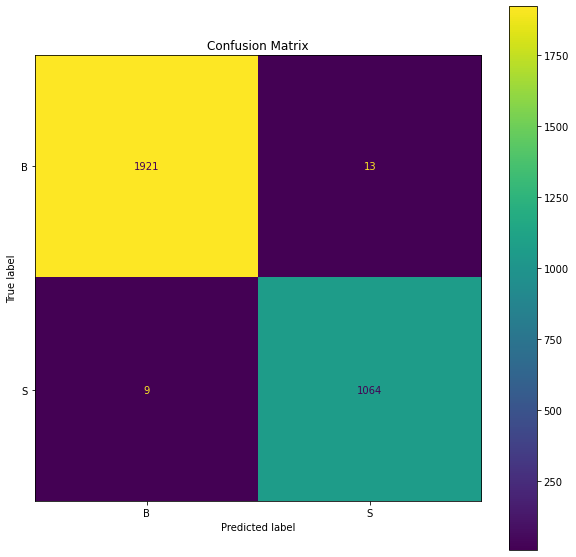

In [13]:
classes = ["B","S"]
cm = confusion_matrix(y_pred,test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()